# Workflow for Geodata preparation for palmpy

Example: Winterthur.

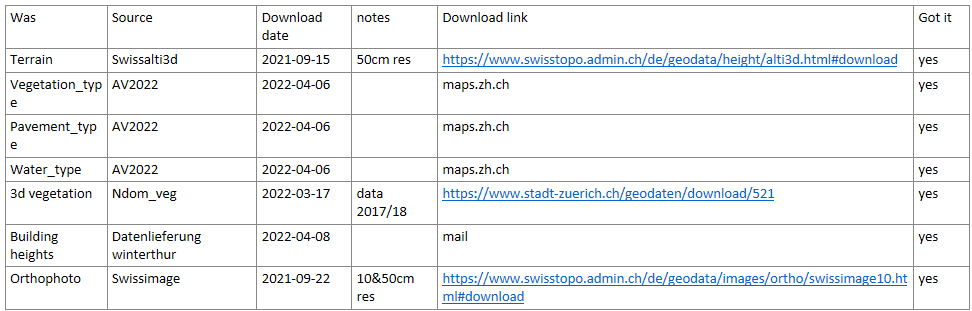

Todo:

- split AV data into 
    - bb
    - pavementareas
    - gebäudefoots

for gebäudefoots: merge data somehow.

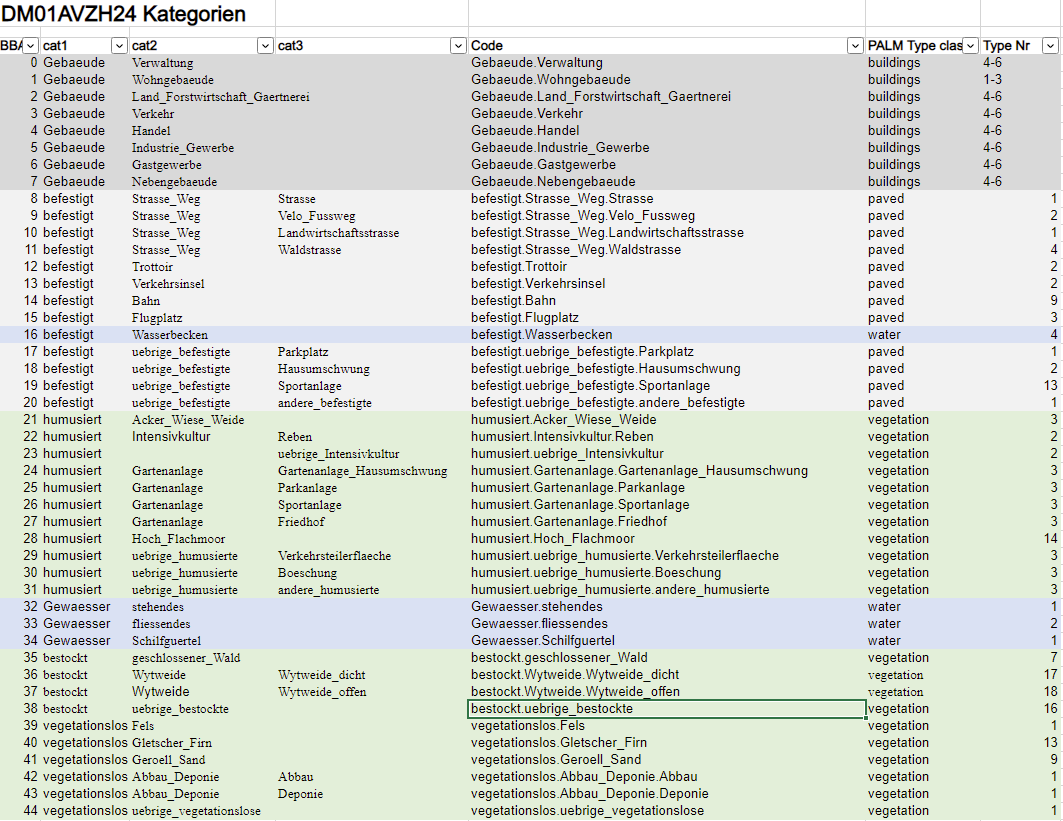

<hr>

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
gdf = gpd.read_file(r'E:\Geodaten\KTZH_AV_2021\Amtliche_Vermessung_-_Datenmode...nton_Zurich_-DM01AVZH24-_-OGD\Bo_BoFlaeche_A.shp', bbox=(2689036,1255050,2705997,1268854))

In [3]:
gdf.total_bounds

array([2687929.032, 1252696.338, 2708072.866, 1270117.409])

In [4]:
gdf.columns

Index(['OBJID', 'ENTSTEHUNG', 'QUALITAET', 'QUALITAET_', 'ART', 'ART_TXT',
       'R1_OBJID', 'R1_NBIDENT', 'R1_IDENTIF', 'R1_BESCHRE', 'R1_GUELTIG',
       'R1_GUELTI1', 'R1_GUELTI2', 'R1_DATUM1', 'geometry'],
      dtype='object')

Seperate into different dataframes

In [5]:
np.sort(gdf.ART.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34,
       35, 38, 41, 42, 43], dtype=int64)

In [6]:
bldg_types = [0,1,2,3,4,5,6,7]
bb_types = [16,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,32,33,34]
pav_types = [8,9,10,11,12,13,14,15,17,18,19,20]

In [7]:
bldgs = gdf[gdf.ART.isin(bldg_types)]
bb = gdf[gdf.ART.isin(bb_types)]
pav = gdf[gdf.ART.isin(pav_types)]

<AxesSubplot:>

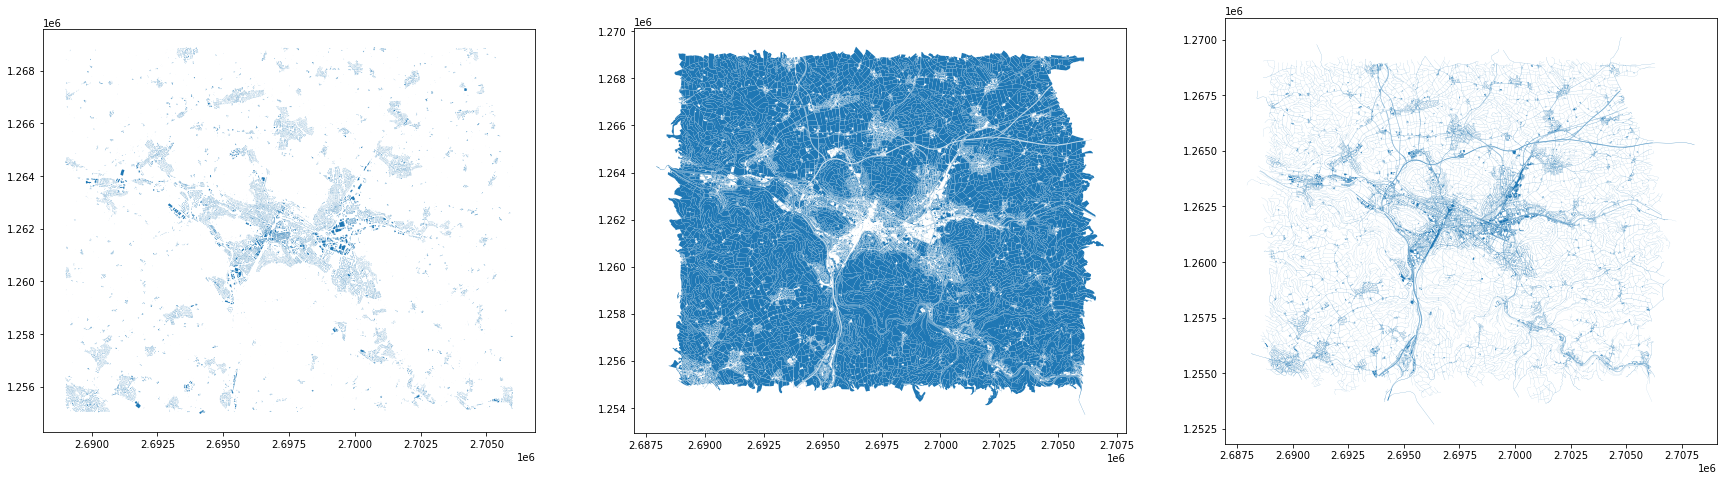

In [8]:
fig,ax = plt.subplots(1,3, figsize=(30,8))
bldgs.plot(ax=ax[0])
bb.plot(ax=ax[1])
pav.plot(ax=ax[2])

In [9]:
%matplotlib qt

<AxesSubplot:>

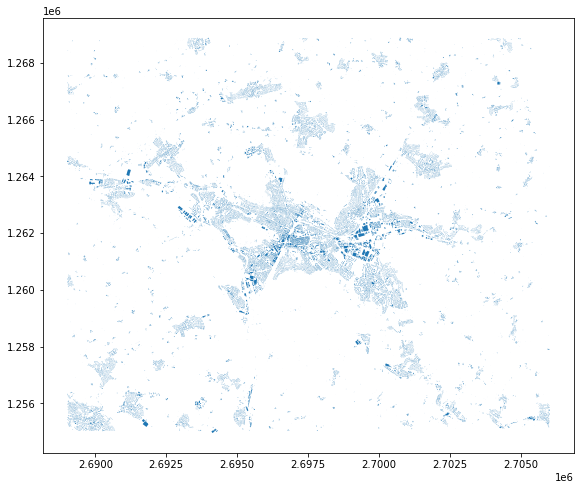

In [9]:
bldgs.plot()

<AxesSubplot:>

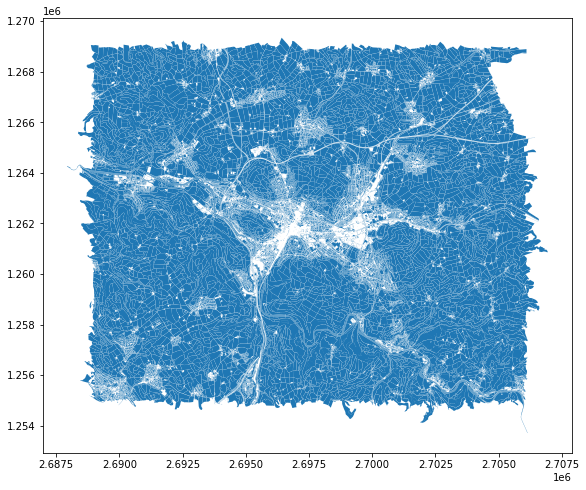

In [10]:
bb.plot()

In [11]:
pav = pav.rename(columns={'ART':'BELAGSART'})

In [12]:
bb = bb.rename(columns={'ART':'OBJEKTART'})

Set CRS to LV95

In [13]:
pav.crs = {'init' :'epsg:2056'}
bldgs.crs = {'init' :'epsg:2056'}
bb.crs = {'init' :'epsg:2056'}

In [14]:
bb.geometry = bb.geometry.buffer(0)
bldgs.geometry = bldgs.geometry.buffer(0)
pav.geometry = pav.geometry.buffer(0)

C:\Users\fluf\Miniconda3\envs\palm\lib\site-packages\geopandas\geodataframe.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[geo_column_name] = level


In [ ]:
#pav.to_file('E:\Geodaten\KTZH_AV_2021\KTZHAV_2021_paved_surfaces.shp')
#bldgs.to_file('E:\Geodaten\KTZH_AV_2021\KTZHAV_2021_building_surfaces.shp')
bb.to_file('E:\Geodaten\KTZH_AV_2021\KTZHAV_2021_vegetation_surfaces.shp')

In [16]:
bldgs

,OBJID,ENTSTEHUNG,QUALITAET,QUALITAET_,ART,ART_TXT,R1_OBJID,R1_NBIDENT,R1_IDENTIF,R1_BESCHRE,R1_GUELTIG,R1_GUELTI1,R1_GUELTI2,R1_DATUM1,geometry
19,5432,BBNachfuehrung[185],0,AV93,7,Gebaeude.Nebengebaeude,185,ZH0200000176,961,BÄ Raststätte Kemptthal,1,gueltig,20190813,-99,"POLYGON ((2695219.693 1256450.755, 2695217.459..."
67,5378,BBNachfuehrung[183],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693982.757 1257009.918, 2693981.319..."
68,5377,BBNachfuehrung[183],0,AV93,7,Gebaeude.Nebengebaeude,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693996.236 1257005.530, 2693999.292..."
71,5368,BBNachfuehrung[174],0,AV93,5,Gebaeude.Industrie_Gewerbe,174,ZH0200000176,952.08,Trafo Rastplatz Kemptthal,1,gueltig,20190214,-99,"POLYGON ((2695138.895 1256174.459, 2695136.170..."
74,5363,BBNachfuehrung[171],0,AV93,7,Gebaeude.Nebengebaeude,171,ZH0200000176,956,Neubau Agrovet,1,gueltig,20190423,-99,"POLYGON ((2693724.845 1256015.429, 2693724.604..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123868,711,BBNachfuehrung[14],0,AV93,7,Gebaeude.Nebengebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690076.405 1261789.385, 2690079.373..."
123874,610,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690652.656 1261498.919, 2690646.330..."
123875,608,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690656.115 1261493.306, 2690657.135..."
123876,603,BBNachfuehrung[14],0,AV93,1,Gebaeude.Wohngebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690653.163 1261525.606, 2690645.004..."


<hr>

## Create the real buildings shapefile

Masterplan: 

Use AV data from below outside of Gemeinde bounds.  
Add the building_block_best_zukunft dataset as main source for building height. Use Baujahr and usage type to create building_type. **PROBLEM: many bldgs have stockwerke=0, so hoehe=3!!!**  
add ab_geb_nicht_3d buildings to it. check for buildings on top of each other.  
add rp_prognostizierte_gebaeude  
add av_geb_proj, which are not unterirdisch, otherwise it's stupid.

In [17]:
bldgs

,OBJID,ENTSTEHUNG,QUALITAET,QUALITAET_,ART,ART_TXT,R1_OBJID,R1_NBIDENT,R1_IDENTIF,R1_BESCHRE,R1_GUELTIG,R1_GUELTI1,R1_GUELTI2,R1_DATUM1,geometry
19,5432,BBNachfuehrung[185],0,AV93,7,Gebaeude.Nebengebaeude,185,ZH0200000176,961,BÄ Raststätte Kemptthal,1,gueltig,20190813,-99,"POLYGON ((2695219.693 1256450.755, 2695217.459..."
67,5378,BBNachfuehrung[183],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693982.757 1257009.918, 2693981.319..."
68,5377,BBNachfuehrung[183],0,AV93,7,Gebaeude.Nebengebaeude,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693996.236 1257005.530, 2693999.292..."
71,5368,BBNachfuehrung[174],0,AV93,5,Gebaeude.Industrie_Gewerbe,174,ZH0200000176,952.08,Trafo Rastplatz Kemptthal,1,gueltig,20190214,-99,"POLYGON ((2695138.895 1256174.459, 2695136.170..."
74,5363,BBNachfuehrung[171],0,AV93,7,Gebaeude.Nebengebaeude,171,ZH0200000176,956,Neubau Agrovet,1,gueltig,20190423,-99,"POLYGON ((2693724.845 1256015.429, 2693724.604..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123868,711,BBNachfuehrung[14],0,AV93,7,Gebaeude.Nebengebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690076.405 1261789.385, 2690079.373..."
123874,610,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690652.656 1261498.919, 2690646.330..."
123875,608,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690656.115 1261493.306, 2690657.135..."
123876,603,BBNachfuehrung[14],0,AV93,1,Gebaeude.Wohngebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690653.163 1261525.606, 2690645.004..."


### create surrounding buildings from AV data

In [18]:
gemeindegrenzen = gpd.read_file(r'K:\Geodaten\KTZH_AV_2021\Amtliche_Vermessung_-_Datenmode...nton_Zurich_-DM01AVZH24-_-OGD\Ge_Gemeindegrenze_A.shp')

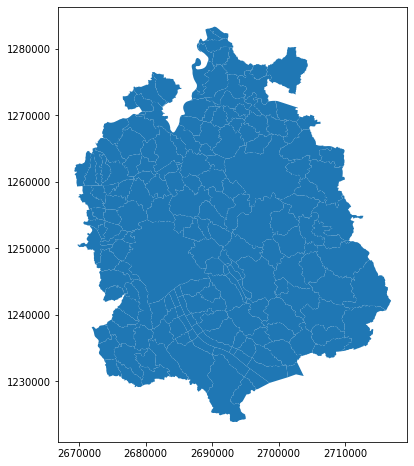

In [67]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)
gemeindegrenzen.plot()

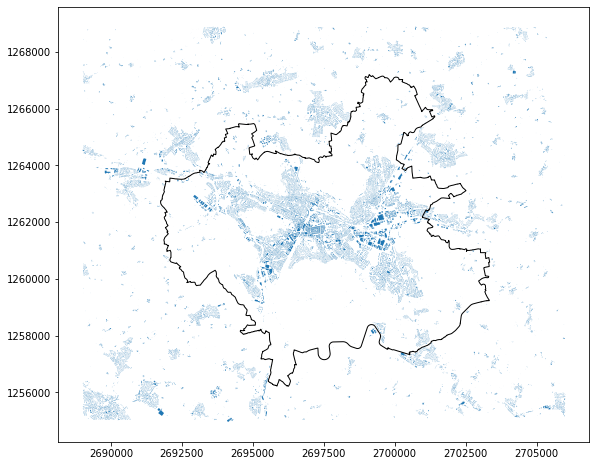

In [20]:
wintigrenze = gemeindegrenzen[gemeindegrenzen.R2_NAME == 'Winterthur']
ax = plt.figure().gca()
bldgs.plot(ax=ax)
wintigrenze.plot(color='None', linewidth=1, edgecolor='black', ax=ax)

make a guetsli-cutout of the buildings dataset with shape of winterthur. It's as easy as baking cookies.

In [21]:
bldg_outer = gpd.overlay(bldgs, wintigrenze, how='difference')

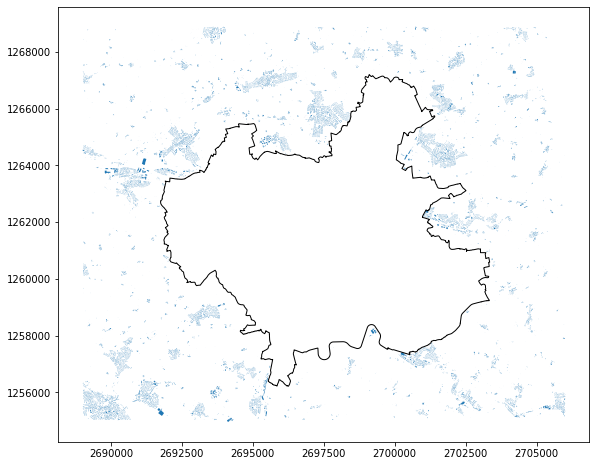

In [22]:
ax = plt.figure().gca()
bldg_outer.plot(ax=ax)
wintigrenze.plot(color='None', linewidth=1, edgecolor='black', ax=ax)

THe amout of buildings was cut in half. 

In [23]:
outpath = r"K:\Geodaten\WinLab"
print(len(bldgs),len(bldg_outer))

47032 24940


In [24]:
bldg_outer

,OBJID,ENTSTEHUNG,QUALITAET,QUALITAET_,ART,ART_TXT,R1_OBJID,R1_NBIDENT,R1_IDENTIF,R1_BESCHRE,R1_GUELTIG,R1_GUELTI1,R1_GUELTI2,R1_DATUM1,geometry
19,5432,BBNachfuehrung[185],0,AV93,7,Gebaeude.Nebengebaeude,185,ZH0200000176,961,BÄ Raststätte Kemptthal,1,gueltig,20190813,-99,"POLYGON ((2695219.693 1256450.755, 2695217.459..."
67,5378,BBNachfuehrung[183],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693982.757 1257009.918, 2693981.319..."
68,5377,BBNachfuehrung[183],0,AV93,7,Gebaeude.Nebengebaeude,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693996.236 1257005.530, 2693999.292..."
71,5368,BBNachfuehrung[174],0,AV93,5,Gebaeude.Industrie_Gewerbe,174,ZH0200000176,952.08,Trafo Rastplatz Kemptthal,1,gueltig,20190214,-99,"POLYGON ((2695138.895 1256174.459, 2695136.170..."
74,5363,BBNachfuehrung[171],0,AV93,7,Gebaeude.Nebengebaeude,171,ZH0200000176,956,Neubau Agrovet,1,gueltig,20190423,-99,"POLYGON ((2693724.845 1256015.429, 2693724.604..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123868,711,BBNachfuehrung[14],0,AV93,7,Gebaeude.Nebengebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690076.405 1261789.385, 2690079.373..."
123874,610,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690652.656 1261498.919, 2690646.330..."
123875,608,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690656.115 1261493.306, 2690657.135..."
123876,603,BBNachfuehrung[14],0,AV93,1,Gebaeude.Wohngebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690653.163 1261525.606, 2690645.004..."


In [25]:
bldg_outer['HEIGHT_TOP'] = 8
bldg_outer['HEIGHT_BOT'] = 0
bldg_outer['ID'] = bldg_outer.index
bldg_outer['BLDGTYP'] = 2 #residential, 1950-2000
bldg_outer

,OBJID,ENTSTEHUNG,QUALITAET,QUALITAET_,ART,ART_TXT,R1_OBJID,R1_NBIDENT,R1_IDENTIF,R1_BESCHRE,R1_GUELTIG,R1_GUELTI1,R1_GUELTI2,R1_DATUM1,geometry,HEIGHT_TOP,HEIGHT_BOT,ID,BLDGTYP
19,5432,BBNachfuehrung[185],0,AV93,7,Gebaeude.Nebengebaeude,185,ZH0200000176,961,BÄ Raststätte Kemptthal,1,gueltig,20190813,-99,"POLYGON ((2695219.693 1256450.755, 2695217.459...",8,0,19,2
67,5378,BBNachfuehrung[183],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693982.757 1257009.918, 2693981.319...",8,0,67,2
68,5377,BBNachfuehrung[183],0,AV93,7,Gebaeude.Nebengebaeude,183,ZH0200000176,960.01,Kleinikon 5,1,gueltig,20190524,-99,"POLYGON ((2693996.236 1257005.530, 2693999.292...",8,0,68,2
71,5368,BBNachfuehrung[174],0,AV93,5,Gebaeude.Industrie_Gewerbe,174,ZH0200000176,952.08,Trafo Rastplatz Kemptthal,1,gueltig,20190214,-99,"POLYGON ((2695138.895 1256174.459, 2695136.170...",8,0,71,2
74,5363,BBNachfuehrung[171],0,AV93,7,Gebaeude.Nebengebaeude,171,ZH0200000176,956,Neubau Agrovet,1,gueltig,20190423,-99,"POLYGON ((2693724.845 1256015.429, 2693724.604...",8,0,74,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123868,711,BBNachfuehrung[14],0,AV93,7,Gebaeude.Nebengebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690076.405 1261789.385, 2690079.373...",8,0,123868,2
123874,610,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690652.656 1261498.919, 2690646.330...",8,0,123874,2
123875,608,BBNachfuehrung[14],0,AV93,2,Gebaeude.Land_Forstwirtschaft_Gaertnerei,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690656.115 1261493.306, 2690657.135...",8,0,123875,2
123876,603,BBNachfuehrung[14],0,AV93,1,Gebaeude.Wohngebaeude,14,ZH0200000065,Oberembrach,Oberembrach,1,gueltig,20070411,-99,"POLYGON ((2690653.163 1261525.606, 2690645.004...",8,0,123876,2


is an id used twice? -> No, good.

In [26]:
bldg_outer.ID.duplicated().sum()

0

In [27]:
#bldg_outer.to_file(outpath+r'\buildings\buildings_outside_winti.shp')

<hr>

### building heights in winterthurer gemeinde

building_block_best_zukunft -> LoD1_Hoehe  
av_gebaeude_nicht_3d -> hoehe  
rp_prognostizierte_gebaeude -> gebaeudeho  
av_gebaeude_proj -> Hoehe  


In [69]:
#bbbz = gpd.read_file(r'K:\Geodaten\WinLab\220408_Datenlieferung_zhaw\211102_Datenlieferung_geonet\building_block_best_zukunft.shp')
bbbz = gpd.read_file(r'K:\Geodaten\WinLab\220408_Datenlieferung_zhaw\211102_Datenlieferung_geonet\building_block_best_zukunft_singleparts_light.shp')
agn3 = gpd.read_file(r'K:\Geodaten\WinLab\220408_Datenlieferung_zhaw\211102_Datenlieferung_geonet\av_gebaeude_nicht_3D.shp')
rpg = gpd.read_file(r'K:\Geodaten\WinLab\220408_Datenlieferung_zhaw\220225_Prognostizierte_Gebaeude\rp_prognostizierte_gebaeude.shp')
agp = gpd.read_file(r'K:\Geodaten\WinLab\220408_Datenlieferung_zhaw\211102_Datenlieferung_geonet\av_gebaeude_proj.shp')

B_Lod1_hoe und LoD1_Hoehe sind gleich:

In [71]:
#len(bbbz) - (bbbz.LoD1_Hoehe == bbbz.B_Lod1_Hoe).sum()

In [77]:
bbbz.Objekttyp.unique()

array(['NebengebÃ¤ude', 'WohngebÃ¤ude', 'Land-, ForstwirtschaftsgebÃ¤ude',
       'Unterstand_Ueberdachung', 'VerwaltungsgebÃ¤ude',
       'IndustriegebÃ¤ude', 'HandelsgebÃ¤ude', None, 'VerkehrsgebÃ¤ude',
       'Silo_Turm_Gasometer', 'GastgewerbegebÃ¤ude', 'Hochkamin',
       'Land-, Forstwirtschaftsg*'], dtype=object)

In [78]:
bbbz['HEIGHT_TOP'] = bbbz.LoD1_Hoehe
bbbz['HEIGHT_BOT'] = 0
bbbz['ID'] = bbbz.index
bbbz['BLDGTYP'] = 999

In [32]:
bbbz.loc[(bbbz.Objekttyp == 'Wohngebäude') & (bbbz.baujahr < 1950), "BLDGTYP"] = 1
bbbz.loc[(bbbz.Objekttyp == 'Wohngebäude') & (bbbz.baujahr >= 1950) & (bbbz.baujahr < 2000), "BLDGTYP"] = 2
bbbz.loc[(bbbz.Objekttyp == 'Wohngebäude') & (bbbz.baujahr >= 2000), "BLDGTYP"] = 3
bbbz.loc[(bbbz.Objekttyp != 'Wohngebäude') & (bbbz.baujahr < 1950), "BLDGTYP"] = 4
bbbz.loc[(bbbz.Objekttyp != 'Wohngebäude') & (bbbz.baujahr >= 1950) & (bbbz.baujahr < 2000), "BLDGTYP"] = 5
bbbz.loc[(bbbz.Objekttyp != 'Wohngebäude') & (bbbz.baujahr >= 2000), "BLDGTYP"] = 6

In [86]:
def classify_bldgtyp(gdf, name_typecol = 'Objekttyp', name_jahrcol = 'baujahr', name_wohngebaeude = 'WohngebÃ¤ude'):
    gdf.loc[(gdf[name_typecol] == name_wohngebaeude) & (gdf[name_jahrcol] < 1950), "BLDGTYP"] = 1
    gdf.loc[(gdf[name_typecol] == name_wohngebaeude) & (gdf[name_jahrcol] >= 1950) & (gdf[name_jahrcol] < 2000), "BLDGTYP"] = 2
    gdf.loc[(gdf[name_typecol] == name_wohngebaeude) & (gdf[name_jahrcol] >= 2000), "BLDGTYP"] = 3
    gdf.loc[(gdf[name_typecol] != name_wohngebaeude) & (gdf[name_jahrcol] < 1950), "BLDGTYP"] = 4
    gdf.loc[(gdf[name_typecol] != name_wohngebaeude) & (gdf[name_jahrcol] >= 1950) & (gdf[name_jahrcol] < 2000), "BLDGTYP"] = 5
    gdf.loc[(gdf[name_typecol] != name_wohngebaeude) & (gdf[name_jahrcol] >= 2000), "BLDGTYP"] = 6
    return gdf

In [87]:
bbbz = classify_bldgtyp(bbbz)

In [88]:
print(bbbz.loc[0,'geometry'])

POLYGON ((2700291.480000097 1266070.060994302, 2700292.458000097 1266070.564994304, 2700295.814000097 1266072.293994303, 2700297.777000097 1266073.304994302, 2700303.754000097 1266061.703994303, 2700301.912000097 1266060.754994302, 2700299.956000097 1266059.746994302, 2700295.743000097 1266067.925994303, 2700294.257000097 1266067.159994299, 2700293.247000097 1266066.639994302, 2700291.480000097 1266070.060994302))


In [89]:
np.sort(bbbz.BLDGTYP.unique())

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [36]:
bbbz.head()

,gml_id,gml_parent,citygml_ta,citygml_fe,citygml_cr,Beschreibu,Dachflaech,Datum_Erst,EGID,Firsthoehe,...,bemerkung,bemerk,bem,GEBNR,geb_kontr,geometry,HEIGHT_TOP,HEIGHT_BOT,ID,BLDGTYP
0,_12458,fme-gen-dae6e156-44f9-41b5-b9e8-d11b6a54cd24,http://www.opengis.net/citygml/building/1.0,groupMember,0.0,Schopf,66.571230,None,201036368,4.481,...,None,None,None,12458,None,MULTIPOLYGON Z (((2700291.480 1266070.061 491....,4.481,0,0,4
1,_12452,fme-gen-dae6e156-44f9-41b5-b9e8-d11b6a54cd24,http://www.opengis.net/citygml/building/1.0,groupMember,0.0,Wohnhaus mit Schopf,249.505279,None,1155351,7.135,...,None,None,None,12452,None,MULTIPOLYGON Z (((2700324.419 1266113.163 493....,7.135,0,1,1
2,_12463,fme-gen-dae6e156-44f9-41b5-b9e8-d11b6a54cd24,http://www.opengis.net/citygml/building/1.0,groupMember,0.0,Garagengebäude,32.197351,None,201034501,3.311,...,None,None,None,12463,None,MULTIPOLYGON Z (((2700374.420 1266088.369 488....,3.311,0,2,5
3,_12455,fme-gen-dae6e156-44f9-41b5-b9e8-d11b6a54cd24,http://www.opengis.net/citygml/building/1.0,groupMember,0.0,Unterstand,85.004142,None,201036346,4.447,...,None,None,None,12455,None,MULTIPOLYGON Z (((2700437.195 1266180.019 488....,4.447,0,3,5
4,_22701,fme-gen-dae6e156-44f9-41b5-b9e8-d11b6a54cd24,http://www.opengis.net/citygml/building/1.0,groupMember,0.0,Rebhaus,10.850436,None,201032067,2.702,...,None,None,None,22701,None,MULTIPOLYGON Z (((2699735.402 1266170.898 524....,2.702,0,4,5


<hr>

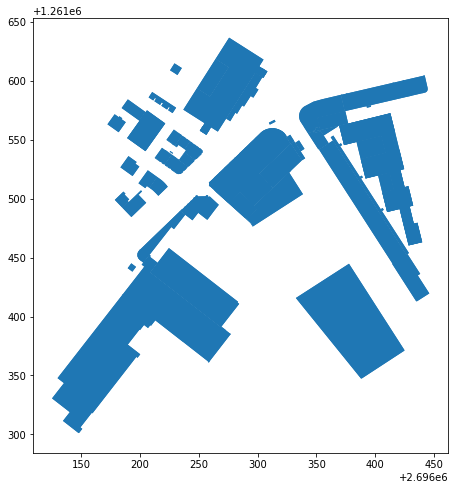

In [68]:
subs = gpd.read_file(r'K:\Geodaten\WinLab\220408_Datenlieferung_zhaw\211102_Datenlieferung_geonet\building_block_best_zukunft_singleparts_subset.shp')
subs.plot()

<hr>

do next file now

,FID_1,ART_ID,ART_NAME,ART_GRUPPE,GEBNR,JOB_VERSIO,EGID,Baujahr,AnzStock,Hoehe,Bemerkung,geometry
0,10768977,10,Nebengebäude,Gebäud,35701,5477642,210292699,2019,0,3.0,None,"POLYGON ((2694577.515 1263381.794, 2694576.338..."
1,11955440,10,Nebengebäude,Gebäud,36251,5539782,191950589,2020,0,3.0,None,"POLYGON ((2699609.030 1261001.347, 2699611.488..."
2,9823380,4,Wohngebäude,Gebäud,32740,5332482,210207682,2018,3,10.0,None,"POLYGON ((2700683.451 1258836.012, 2700682.312..."
3,9819938,4,Wohngebäude,Gebäud,32809,5412882,210207775,2018,5,16.0,None,"POLYGON ((2699991.929 1262258.598, 2699998.646..."
4,9677137,4,Wohngebäude,Gebäud,34352,5379100,210216465,2018,4,13.0,None,"POLYGON ((2697761.097 1262183.542, 2697764.209..."
...,...,...,...,...,...,...,...,...,...,...,...,...
608,8779680,4,Wohngebäude,Gebäud,33052,5237287,210212076,2017,2,7.0,None,"POLYGON ((2693493.103 1262629.134, 2693490.026..."
609,10907232,10,Nebengebäude,Gebäud,35646,5514670,210265553,2019,0,3.0,None,"POLYGON ((2700181.557 1262135.639, 2700183.396..."
610,9754557,10,Nebengebäude,Gebäud,34830,5390627,210220987,2019,0,3.0,None,"POLYGON ((2695508.829 1263049.318, 2695507.287..."
611,11936741,4,Wohngebäude,Gebäud,34953,5530844,210220660,2020,4,12.0,RE,"POLYGON ((2696190.017 1262247.372, 2696188.254..."


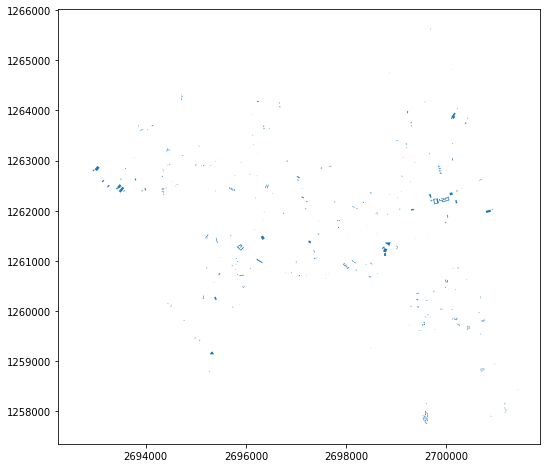

In [117]:
plt.rcParams["figure.figsize"] = (12,8)

agn3.plot()
agn3

In [118]:
agn3['HEIGHT_TOP'] = agn3.Hoehe
agn3['HEIGHT_BOT'] = 0
agn3['ID'] = agn3.index
agn3['BLDGTYP'] = 999

In [119]:
agn3 = classify_bldgtyp(agn3, name_jahrcol="Baujahr", name_typecol="ART_NAME", name_wohngebaeude='Wohngebäude')

In [120]:
agn3

,FID_1,ART_ID,ART_NAME,ART_GRUPPE,GEBNR,JOB_VERSIO,EGID,Baujahr,AnzStock,Hoehe,Bemerkung,geometry,HEIGHT_TOP,HEIGHT_BOT,ID,BLDGTYP
0,10768977,10,Nebengebäude,Gebäud,35701,5477642,210292699,2019,0,3.0,None,"POLYGON ((2694577.515 1263381.794, 2694576.338...",3.0,0,0,6
1,11955440,10,Nebengebäude,Gebäud,36251,5539782,191950589,2020,0,3.0,None,"POLYGON ((2699609.030 1261001.347, 2699611.488...",3.0,0,1,6
2,9823380,4,Wohngebäude,Gebäud,32740,5332482,210207682,2018,3,10.0,None,"POLYGON ((2700683.451 1258836.012, 2700682.312...",10.0,0,2,3
3,9819938,4,Wohngebäude,Gebäud,32809,5412882,210207775,2018,5,16.0,None,"POLYGON ((2699991.929 1262258.598, 2699998.646...",16.0,0,3,3
4,9677137,4,Wohngebäude,Gebäud,34352,5379100,210216465,2018,4,13.0,None,"POLYGON ((2697761.097 1262183.542, 2697764.209...",13.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,8779680,4,Wohngebäude,Gebäud,33052,5237287,210212076,2017,2,7.0,None,"POLYGON ((2693493.103 1262629.134, 2693490.026...",7.0,0,608,3
609,10907232,10,Nebengebäude,Gebäud,35646,5514670,210265553,2019,0,3.0,None,"POLYGON ((2700181.557 1262135.639, 2700183.396...",3.0,0,609,6
610,9754557,10,Nebengebäude,Gebäud,34830,5390627,210220987,2019,0,3.0,None,"POLYGON ((2695508.829 1263049.318, 2695507.287...",3.0,0,610,6
611,11936741,4,Wohngebäude,Gebäud,34953,5530844,210220660,2020,4,12.0,RE,"POLYGON ((2696190.017 1262247.372, 2696188.254...",12.0,0,611,3


<hr>

do next file now

Index(['fi', 'are', 'jah', 'gebaeudeh', 'dat_3d_na', 'name_baut', 'status_ba',
       'dat_vor_b', 'geometry'],
      dtype='object')

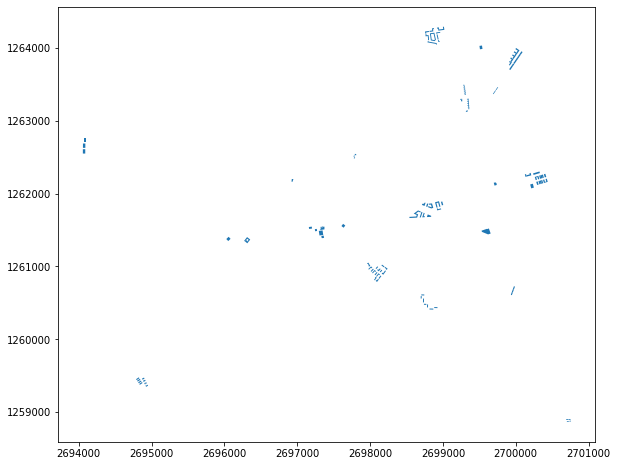

In [121]:
rpg.plot()
rpg.columns

In [122]:
rpg['HEIGHT_TOP'] = rpg.gebaeudeh
rpg['HEIGHT_BOT'] = 0
rpg['ID'] = rpg.index
rpg['BLDGTYP'] = 6

In [123]:
rpg.name_baut.unique()

array(['Gestaltungsplan Ohrbühlstrasse, Etappe 1',
       'Grüze / Häuser-Etappe 1', 'Areal Binzhof Masterplan Etappe 1',
       'Schulhaus Wallrüti (2. Etappe) – Ersatzneubau Turnhallentrakt/Singsaa',
       'Wässerwiesen Teil 3 (Gewerbe)', 'Hagmannareal Etappe 2',
       'Pappelwe', 'Rychenbergstrasse neben 101 (Cerfeda)',
       'Campus T_ZHAW, Etappe 2', 'GP Grabenacke',
       'Sulzerareal - Werk 1 - BF 4b-Rocke',
       'Keller-Areal Dättnau Etappe 3',
       'Tegerloo - Eichwaldhof, Etappe 1', 'Grüze / Hochhaus Evolu',
       'Talgut Teil HG', 'Talgut - Teil GWG (QEZ-Talgut)',
       'GP Am Bach Mitt', 'Lavendelwe',
       'Teil WGT «Talgut» Arch. Sik-Etappe 4', 'Campus T_ZHAW, Etappe 1',
       'Keller-Areal Dättnau Etappe 4',
       'Neuhegi Baufeld 3, Etappe 2 Gewerb', 'Neuhegi Baufeld 2, Hochhau',
       'Teil WGT «Talgut» Arch. Sik-Etappe 3',
       '"Chopf ab"-Brauerei / Doppelle', 'BFS',
       'Teil WGT «Talgut» Arch. Sik-Etappe 2', 'GP Schaffhauserstrass',
       'Neuhe

In [124]:
rpg

,fi,are,jah,gebaeudeh,dat_3d_na,name_baut,status_ba,dat_vor_b,geometry,HEIGHT_TOP,HEIGHT_BOT,ID,BLDGTYP
0,191001,None,2018,17.5,2021-09-20,"Gestaltungsplan Ohrbühlstrasse, Etappe 1",Entwicklungsphas,2027-12-31,"POLYGON ((2700398.869 1262223.044, 2700386.022...",17.5,0,0,6
1,191010,None,2018,3.0,None,Grüze / Häuser-Etappe 1,Entwicklungsphas,2027-12-31,"POLYGON ((2698744.116 1261734.263, 2698749.255...",3.0,0,1,6
2,191022,None,2018,12.0,2020-07-24,Areal Binzhof Masterplan Etappe 1,Entwicklungsphas,2027-12-31,"POLYGON ((2698789.721 1264176.072, 2698802.096...",12.0,0,2,6
3,191027,None,2018,13.0,2021-10-29,Schulhaus Wallrüti (2. Etappe) – Ersatzneubau ...,Entwicklungsphas,2029-12-31,"POLYGON ((2699522.407 1264031.719, 2699536.418...",13.0,0,3,6
4,191079,None,2018,13.5,2020-07-24,Wässerwiesen Teil 3 (Gewerbe),Entwicklungsphas,2026-12-31,"POLYGON ((2694068.617 1262610.004, 2694070.601...",13.5,0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,197830,None,2020,16.8,2020-07-24,"Tegerloo - Eichwaldhof, Etappe 1",In Planun,2026-12-31,"POLYGON ((2700034.708 1263979.419, 2700051.755...",16.8,0,149,6
150,197832,None,2020,14.3,2020-07-24,"Tegerloo - Eichwaldhof, Etappe 1",In Planun,2026-12-31,"POLYGON ((2699996.521 1263923.793, 2699971.554...",14.3,0,150,6
151,197833,None,2020,16.8,2020-07-24,"Tegerloo - Eichwaldhof, Etappe 1",In Planun,2026-12-31,"POLYGON ((2699996.730 1263920.563, 2700012.083...",16.8,0,151,6
152,197841,None,2020,17.3,2020-07-24,"Tegerloo - Eichwaldhof, Etappe 1",In Planun,2026-12-31,"POLYGON ((2700052.227 1263916.739, 2700067.939...",17.3,0,152,6


<hr>

do next file now. drop unterirdische Gebäude

In [125]:
agp = agp.loc[agp.ART_NAME != 'unterirdisches Gebäude']

In [126]:
agp.ART_NAME.unique()

array(['Verwaltungsgebäude', 'Wohngebäude',
       'Land-, Forstwirtschaftsgebäud', 'Verkehrsgebäude',
       'Handelsgebäude', 'Industriegebäude', 'Gastgewerbegebäude',
       'Nebengebäude', 'Unterstand, Überdachung'], dtype=object)

Index(['FID_1', 'ART_ID', 'ART_NAME', 'ART_GRUPPE', 'GEBNR', 'EGID', 'Baujahr',
       'AnzStock', 'Hoehe', 'Flaeche', 'Bemerkung', 'geometry', 'HEIGHT_TOP',
       'HEIGHT_BOT', 'ID', 'BLDGTYP'],
      dtype='object')

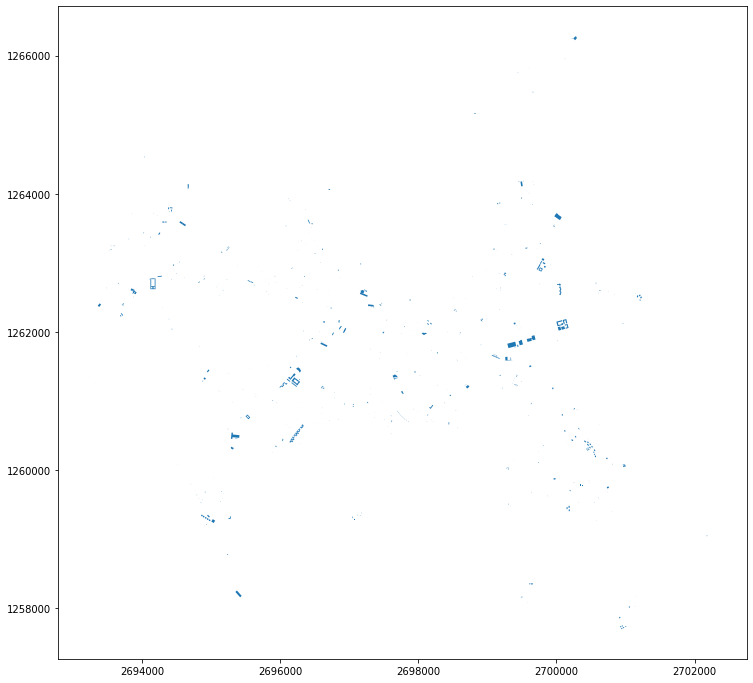

In [127]:
plt.rcParams["figure.figsize"] = (16,12)

agp.plot()
agp.columns

In [128]:
agp['HEIGHT_TOP'] = agp.Hoehe
agp['HEIGHT_BOT'] = 0
agp['ID'] = agp.index
agp['BLDGTYP'] = 999

In [129]:
agp.ART_NAME.unique()

array(['Verwaltungsgebäude', 'Wohngebäude',
       'Land-, Forstwirtschaftsgebäud', 'Verkehrsgebäude',
       'Handelsgebäude', 'Industriegebäude', 'Gastgewerbegebäude',
       'Nebengebäude', 'Unterstand, Überdachung'], dtype=object)

In [130]:
agp = classify_bldgtyp(agp, name_jahrcol='Baujahr', name_typecol='ART_NAME', name_wohngebaeude='Wohngebäude')

In [131]:
agp.loc[(agp.Baujahr == 0) & (agp.ART_NAME == 'Wohngebäude'), 'BLDGTYP'] = 3

agp.loc[(agp.Baujahr == 0) & (agp.ART_NAME != 'Wohngebäude'), 'BLDGTYP'] = 6

In [132]:
agp

,FID_1,ART_ID,ART_NAME,ART_GRUPPE,GEBNR,EGID,Baujahr,AnzStock,Hoehe,Flaeche,Bemerkung,geometry,HEIGHT_TOP,HEIGHT_BOT,ID,BLDGTYP
0,3466522,3,Verwaltungsgebäude,proj. Gebäude,23482,201010138,1958,0,0.0,2.13,nicht relevant,"POLYGON ((2697190.654 1262639.581, 2697191.530...",0.0,0,0,5
1,3466520,3,Verwaltungsgebäude,proj. Gebäude,23482,201010138,1958,0,34.0,2067.62,RE gemäss ASW,"POLYGON ((2697173.095 1262605.963, 2697184.831...",34.0,0,1,5
2,10786204,3,Verwaltungsgebäude,proj. Gebäude,36019,210295156,0,0,17.0,1904.90,RE BauPro,"POLYGON ((2697272.752 1262378.636, 2697275.447...",17.0,0,2,6
3,10801811,3,Verwaltungsgebäude,proj. Gebäude,485,1161926,1846,3,10.0,89.39,None,"POLYGON ((2697686.439 1261429.790, 2697692.410...",10.0,0,3,4
4,11981914,3,Verwaltungsgebäude,proj. Gebäude,1123,1161876,1876,3,10.0,268.04,None,"POLYGON ((2697946.390 1261413.902, 2697942.618...",10.0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,11955125,100012,"Unterstand, Überdachung",proj. Gebäude,24541,201022410,2002,2,7.0,23.61,None,"POLYGON ((2694857.372 1259540.750, 2694859.815...",7.0,0,734,6
735,11954916,100012,"Unterstand, Überdachung",proj. Gebäude,36249,0,0,0,3.0,40.64,None,"POLYGON ((2694495.882 1262848.763, 2694501.043...",3.0,0,735,6
736,11954296,100012,"Unterstand, Überdachung",proj. Gebäude,36248,0,0,0,3.0,124.28,None,"POLYGON ((2698129.319 1260795.138, 2698138.922...",3.0,0,736,6
737,11954248,100012,"Unterstand, Überdachung",proj. Gebäude,36245,0,0,0,3.0,25.00,None,"POLYGON ((2700294.546 1260873.798, 2700298.892...",3.0,0,737,6


In [133]:
bbbz.to_file(outpath+r'\buildings\buildings_bbbz.shp')

In [72]:
rpg.to_file(outpath+r'\buildings\buildings_rpg.shp')

In [106]:
agp.to_file(outpath+r'\buildings\buildings_agp.shp')

In [72]:
agn3.to_file(outpath+r'\buildings\buildings_agn3.shp')

In [137]:
agn3.columns

Index(['FID_1', 'ART_ID', 'ART_NAME', 'ART_GRUPPE', 'GEBNR', 'JOB_VERSIO',
       'EGID', 'Baujahr', 'AnzStock', 'Hoehe', 'Bemerkung', 'geometry',
       'HEIGHT_TOP', 'HEIGHT_BOT', 'ID', 'BLDGTYP'],
      dtype='object')

In [147]:
rpg_s = rpg[['HEIGHT_TOP','HEIGHT_BOT','ID','BLDGTYP','geometry']]
agp_s = agp[['HEIGHT_TOP','HEIGHT_BOT','ID','BLDGTYP','geometry']]
agn3_s = agn3[['HEIGHT_TOP','HEIGHT_BOT','ID','BLDGTYP','geometry']]
bldg_outer_s = bldg_outer[['HEIGHT_TOP','HEIGHT_BOT','ID','BLDGTYP','geometry']]

In [152]:
import pandas as pd
bldglist = [bbbz, agn3_s, rpg_s, agp_s, bldg_outer_s]
bldg_tot = pd.concat(bldglist, ignore_index=True)
bldg_tot['ID'] = bldg_tot.index

In [145]:
%matplotlib qt
bldg_tot.plot()

In [153]:
bldg_tot.to_file(outpath+r'\buildings\buildings_merge.shp')